In [1]:
import numpy as np
from collections import defaultdict

# ============ 1. 准备数据 ============
corpus = [
    "i like deep learning",
    "i like nlp",
    "i enjoy flying"
]

In [8]:

# 分词
tokens = [w for sent in corpus for w in sent.split()]
vocab = sorted(set(tokens))
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}
vocab_size = len(vocab)

print("词表:", vocab, word2idx, idx2word, sep="\n")

词表:
['deep', 'enjoy', 'flying', 'i', 'learning', 'like', 'nlp']
{'deep': 0, 'enjoy': 1, 'flying': 2, 'i': 3, 'learning': 4, 'like': 5, 'nlp': 6}
{0: 'deep', 1: 'enjoy', 2: 'flying', 3: 'i', 4: 'learning', 5: 'like', 6: 'nlp'}


In [4]:
# ============ 2. 构造训练样本 ============
def generate_skipgram_pairs(tokens, window_size=1):
    pairs = []
    for i, center in enumerate(tokens):
        for j in range(max(0, i - window_size), min(len(tokens), i + window_size + 1)):
            if i != j:
                pairs.append((center, tokens[j]))
    return pairs

pairs = generate_skipgram_pairs(tokens)
print("样本对示例:", pairs)

样本对示例: [('i', 'like'), ('like', 'i'), ('like', 'deep'), ('deep', 'like'), ('deep', 'learning'), ('learning', 'deep'), ('learning', 'i'), ('i', 'learning'), ('i', 'like'), ('like', 'i'), ('like', 'nlp'), ('nlp', 'like'), ('nlp', 'i'), ('i', 'nlp'), ('i', 'enjoy'), ('enjoy', 'i'), ('enjoy', 'flying'), ('flying', 'enjoy')]


In [9]:
# ============ 3. 辅助函数 ============
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

In [10]:
# ============ 4. 初始化参数 ============
embedding_dim = 5
np.random.seed(42)
W_in = np.random.randn(vocab_size, embedding_dim) * 0.01   # 输入层权重 (vocab_size x dim)
W_out = np.random.randn(embedding_dim, vocab_size) * 0.01  # 输出层权重 (dim x vocab_size)

In [11]:
# ============ 5. 训练 ============
lr = 0.05
epochs = 2000
window_size = 1

for epoch in range(epochs):
    loss = 0
    for center, context in pairs:
        center_idx = word2idx[center]
        context_idx = word2idx[context]

        # 前向传播
        h = W_in[center_idx]              # 中心词向量 (1 x dim)
        u = np.dot(W_out.T, h)            # (vocab_size,)
        y_pred = softmax(u)

        # 损失函数 (交叉熵)
        loss -= np.log(y_pred[context_idx] + 1e-8)

        # 反向传播
        y_pred[context_idx] -= 1  # y_pred - y_true
        dW_out = np.outer(h, y_pred)       # (dim x vocab_size)
        dW_in = np.dot(W_out, y_pred)      # (dim,)

        # 参数更新
        W_in[center_idx] -= lr * dW_in
        W_out -= lr * dW_out

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.4f}")

Epoch 0, Loss = 35.0274
Epoch 200, Loss = 18.8889
Epoch 400, Loss = 18.8803
Epoch 600, Loss = 18.8645
Epoch 800, Loss = 18.8519
Epoch 1000, Loss = 18.8409
Epoch 1200, Loss = 18.8316
Epoch 1400, Loss = 18.8247
Epoch 1600, Loss = 18.8200
Epoch 1800, Loss = 18.8171


In [12]:

# ============ 6. 结果查看 ============
def get_word_vec(word):
    return W_in[word2idx[word]]

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print("\n[相似度检查]")
for w1, w2 in [("like", "enjoy"), ("deep", "nlp"), ("flying", "learning")]:
    sim = cosine_similarity(get_word_vec(w1), get_word_vec(w2))
    print(f"{w1} vs {w2} → 相似度: {sim:.3f}")



[相似度检查]
like vs enjoy → 相似度: 0.175
deep vs nlp → 相似度: 0.328
flying vs learning → 相似度: -0.367


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1130af760>>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/homl3/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Device: cpu
[==================================================] 100.0% 31.6/31.6MB downloaded
Total tokens in text8: 17005207
Filtered token count: 15268026, vocab size: 10000
Total training pairs after filtering: 61072098
Epoch 1/5  avg_loss = 2.8055
Epoch 2/5  avg_loss = 2.7722
Epoch 3/5  avg_loss = 2.7707
Epoch 4/5  avg_loss = 2.7701
Epoch 5/5  avg_loss = 2.7698


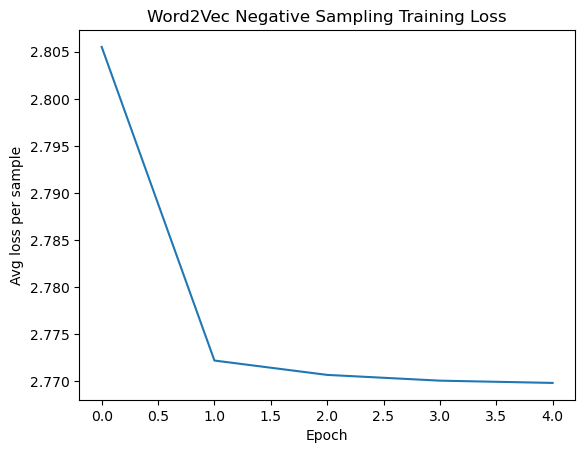

Most similar to king : [('prince', 0.7016319632530212), ('vii', 0.6731394529342651), ('xiv', 0.6678318977355957), ('duke', 0.6535584926605225), ('viii', 0.6514431834220886)]
Most similar to queen : [('elizabeth', 0.7981604337692261), ('princess', 0.757513165473938), ('mary', 0.6955382823944092), ('bride', 0.6936591863632202), ('victoria', 0.6923622488975525)]
Most similar to woman : [('child', 0.7146254777908325), ('man', 0.7032318711280823), ('girl', 0.6733605265617371), ('person', 0.6728776693344116), ('lady', 0.6268603205680847)]
Most similar to man : [('woman', 0.7032318711280823), ('girl', 0.6267704963684082), ('creature', 0.6121937036514282), ('wise', 0.6056833267211914), ('spider', 0.591452419757843)]
Most similar to computer : [('computing', 0.7194661498069763), ('hardware', 0.6886996030807495), ('computers', 0.6592779159545898), ('calculator', 0.6316033005714417), ('console', 0.6270796656608582)]
Most similar to data : [('coding', 0.6717900633811951), ('compression', 0.6640878

/var/folders/kw/ysl7ggsn6wz6r9ms_r7scdgh0000gn/T/ipykernel_20930/3863522990.py:154: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  res.append((idx2word[i], float(sims[i].cpu())))


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import gensim.downloader as api
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

# ================= 配置 =================
seed = 42
random.seed(seed)
torch.manual_seed(seed)
device = torch.device("mps" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ================= 1) 加载 text8 语料 =================
dataset = api.load("text8")
tokens = []
for sent in dataset:
    tokens.extend(sent)
print("Total tokens in text8:", len(tokens))

# ================= 2) 只保留前 10000 高频词 =================
freq = Counter(tokens)
most_common = freq.most_common(10000)
vocab = [w for w, _ in most_common]
vocab_size = len(vocab)
word2idx = {w:i for i, w in enumerate(vocab)}
idx2word = {i:w for w,i in word2idx.items()}

# 过滤 tokens，只保留高频词
tokens = [w for w in tokens if w in word2idx]
print(f"Filtered token count: {len(tokens)}, vocab size: {vocab_size}")

# ================= 3) 生成训练对 =================
window_size = 2
pairs = []
for i, w in enumerate(tokens):
    center_idx = word2idx[w]
    left = max(0, i - window_size)
    right = min(len(tokens), i + window_size + 1)
    for j in range(left, right):
        if j == i:
            continue
        context_word = tokens[j]
        if context_word not in word2idx:
            continue
        context_idx = word2idx[context_word]
        pairs.append((center_idx, context_idx))
print("Total training pairs after filtering:", len(pairs))

# ================= 4) 负采样分布 =================
freq_list = torch.tensor([freq[w] for w in vocab], dtype=torch.float)
unigram = freq_list.pow(0.75)
unigram = unigram / unigram.sum()
unigram = unigram.to(device)

# ================= 5) Dataset + DataLoader =================
class SkipGramDataset(Dataset):
    def __init__(self, pairs):
        self.pairs = pairs
    def __len__(self):
        return len(self.pairs)
    def __getitem__(self, idx):
        return self.pairs[idx]

batch_size = 512
dataset_obj = SkipGramDataset(pairs)
dataloader = DataLoader(dataset_obj, batch_size=batch_size, shuffle=True, drop_last=True)

# ================= 6) 模型参数（不用 nn.Embedding） =================
embedding_dim = 128
W_in = nn.Parameter(torch.randn(vocab_size, embedding_dim, device=device) * 0.01)
W_out = nn.Parameter(torch.randn(vocab_size, embedding_dim, device=device) * 0.01)

neg_samples = 10
lr = 0.001
weight_decay = 1e-6
grad_clip = 5.0
epochs = 5

optimizer = optim.Adam([W_in, W_out], lr=lr, weight_decay=weight_decay)
sigmoid = torch.sigmoid

# ================= 7) TensorBoard =================
writer = SummaryWriter(log_dir="./runs/word2vec_ns")

# ================= 8) 训练循环 =================
loss_history = []
for epoch in range(1, epochs+1):
    total_loss = 0.0
    for step, (centers, contexts) in enumerate(dataloader):
        centers = centers.to(device)
        contexts = contexts.to(device)
        B = centers.size(0)

        v_c = W_in[centers]        # (B, D)
        v_pos = W_out[contexts]    # (B, D)

        neg_idx = torch.multinomial(unigram, B * neg_samples, replacement=True).view(B, neg_samples).to(device)
        v_neg = W_out[neg_idx]     # (B, K, D)

        # 正样本损失
        score_pos = torch.sum(v_c * v_pos, dim=1)
        loss_pos = -torch.log(sigmoid(score_pos) + 1e-10)

        # 负样本损失
        score_neg = torch.bmm(v_neg, v_c.unsqueeze(2)).squeeze(2)
        loss_neg = -torch.sum(torch.log(sigmoid(-score_neg) + 1e-10), dim=1)

        loss = torch.mean(loss_pos + loss_neg)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_([W_in, W_out], max_norm=grad_clip)
        optimizer.step()

        total_loss += loss.item() * B

        # 每 batch 写入 TensorBoard
        global_step = (epoch-1)*len(dataloader) + step
        writer.add_scalar("Loss/Batch", loss.item(), global_step)

    avg_loss = total_loss / len(dataset_obj)
    loss_history.append(avg_loss)
    writer.add_scalar("Loss/Epoch", avg_loss, epoch)
    print(f"Epoch {epoch}/{epochs}  avg_loss = {avg_loss:.4f}")

    # 向量归一化
    with torch.no_grad():
        W_in.data = W_in.data / (torch.norm(W_in.data, dim=1, keepdim=True) + 1e-9)
        W_out.data = W_out.data / (torch.norm(W_out.data, dim=1, keepdim=True) + 1e-9)

# ================= 9) 绘制 loss =================
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Avg loss per sample")
plt.title("Word2Vec Negative Sampling Training Loss")
plt.show()

# ================= 10) 查看相似词 =================
def most_similar(word, topk=10):
    if word not in word2idx:
        return []
    idx = word2idx[word]
    vec = W_in[idx]
    sims = torch.matmul(W_in, vec) / (torch.norm(W_in, dim=1) * torch.norm(vec) + 1e-9)
    topk_idx = torch.topk(sims, topk+1).indices.tolist()
    res = []
    for i in topk_idx:
        if i != idx:
            res.append((idx2word[i], float(sims[i].cpu())))
        if len(res) >= topk:
            break
    return res

probe_words = ["king", "queen", "woman", "man", "computer", "data"]
for probe in probe_words:
    print("Most similar to", probe, ":", most_similar(probe, topk=5))

# ================= 11) 关闭 TensorBoard =================
writer.close()


In [22]:
import numpy as np
from collections import defaultdict

# ============ 1. 准备数据 ============
corpus = [
    "i like deep learning",
    "i like nlp",
    "i enjoy flying"
]

# 分词
tokens = [w for sent in corpus for w in sent.split()]
vocab = sorted(set(tokens))
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}
vocab_size = len(vocab)

print("词表:", vocab)

# ============ 2. 构造训练样本 ============
def generate_skipgram_pairs(tokens, window_size=1):
    pairs = []
    for i, center in enumerate(tokens):
        for j in range(max(0, i - window_size), min(len(tokens), i + window_size + 1)):
            if i != j:
                pairs.append((center, tokens[j]))
    return pairs

pairs = generate_skipgram_pairs(tokens)
print("样本对示例:", pairs[:])

词表: ['deep', 'enjoy', 'flying', 'i', 'learning', 'like', 'nlp']
样本对示例: [('i', 'like'), ('like', 'i'), ('like', 'deep'), ('deep', 'like'), ('deep', 'learning'), ('learning', 'deep'), ('learning', 'i'), ('i', 'learning'), ('i', 'like'), ('like', 'i'), ('like', 'nlp'), ('nlp', 'like'), ('nlp', 'i'), ('i', 'nlp'), ('i', 'enjoy'), ('enjoy', 'i'), ('enjoy', 'flying'), ('flying', 'enjoy')]


In [ ]:

# ============ 3. 初始化参数 ============
embedding_dim = 5
np.random.seed(42)
W_in = np.random.randn(vocab_size, embedding_dim) * 0.01   # 输入层权重 (vocab_size x dim)
W_out = np.random.randn(embedding_dim, vocab_size) * 0.01  # 输出层权重 (dim x vocab_size)

# ============ 4. 辅助函数 ============
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / e.sum()

# ============ 5. 训练 ============
lr = 0.05
epochs = 2000
window_size = 1

for epoch in range(epochs):
    loss = 0
    for center, context in pairs:
        center_idx = word2idx[center]
        context_idx = word2idx[context]

        # 前向传播
        h = W_in[center_idx]              # 中心词向量 (1 x dim)
        u = np.dot(W_out.T, h)            # (vocab_size,)
        y_pred = softmax(u)

        # 损失函数 (交叉熵)
        loss -= np.log(y_pred[context_idx] + 1e-8)

        # 反向传播
        y_pred[context_idx] -= 1  # y_pred - y_true
        dW_out = np.outer(h, y_pred)       # (dim x vocab_size)
        dW_in = np.dot(W_out, y_pred)      # (dim,)

        # 参数更新
        W_in[center_idx] -= lr * dW_in
        W_out -= lr * dW_out

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.4f}")

# ============ 6. 结果查看 ============
def get_word_vec(word):
    return W_in[word2idx[word]]

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print("\n[相似度检查]")
for w1, w2 in [("like", "enjoy"), ("deep", "nlp"), ("flying", "learning")]:
    sim = cosine_similarity(get_word_vec(w1), get_word_vec(w2))
    print(f"{w1} vs {w2} → 相似度: {sim:.3f}")
